ASSIGNMENT 5: COVID-19 DATA ANALYSIS PROJECT
1. Project Overview
This project aims to analyze and find correlations between the global impact of the COVID-19 pandemic and a country's happiness score. We will work with two primary datasets: one containing COVID-19 confirmed cases and deaths by date, and another with the Worldwide Happiness Report.

The main steps of this analysis are:

Data Loading and Preprocessing: Load the datasets and clean them for consistency.

Dataset Merging: Combine the COVID-19 and Happiness data into a single, comprehensive DataFrame.

Exploratory Data Analysis (EDA): Visualize trends and correlations to uncover relationships.

Insight Generation: Summarize our findings and answer the core question: "Did happier countries have better COVID-19 outcomes?"

2. Data Loading and Preprocessing
In this step, we will load the three provided datasets. The COVID-19 datasets are in a "wide" format, so we need to process them to get the total number of cases and deaths per country.

2.1. Importing Libraries and Loading Datasets
We will use pandas for data manipulation and matplotlib.pyplot and seaborn for visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
confirmed_df = pd.read_csv('covid19_Confirmed_dataset.csv')
deaths_df = pd.read_csv('covid19_deaths_dataset.csv')
happiness_df = pd.read_csv('worldwide_happiness_report.csv')

print("Confirmed Cases Dataset Head:")
print(confirmed_df.head())
print("\nDeaths Dataset Head:")
print(deaths_df.head())
print("\nHappiness Report Dataset Head:")
print(happiness_df.head())

Confirmed Cases Dataset Head:
  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/

2.2. Cleaning the COVID-19 Datasets
The COVID-19 datasets have a Province/State column which is redundant for our country-level analysis. We will drop it along with the geographical coordinates.

In [3]:
# Drop irrelevant columns from the COVID-19 datasets
confirmed_df = confirmed_df.drop(columns=['Lat', 'Long', 'Province/State'])
deaths_df = deaths_df.drop(columns=['Lat', 'Long', 'Province/State'])

print("Cleaned Confirmed Cases Dataset Head:")
print(confirmed_df.head())
print("\nCleaned Deaths Dataset Head:")
print(deaths_df.head())

Cleaned Confirmed Cases Dataset Head:
  Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
0    Afghanistan        0        0        0        0        0        0   
1        Albania        0        0        0        0        0        0   
2        Algeria        0        0        0        0        0        0   
3        Andorra        0        0        0        0        0        0   
4         Angola        0        0        0        0        0        0   

   1/28/20  1/29/20  1/30/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
0     1463     1531 

2.3. Aggregating COVID-19 Data
To get the total number of cases and deaths for each country, we will group the data by Country/Region and sum the daily counts. The last column of the dataset represents the final count.

In [4]:
# Group by country and calculate total confirmed cases and deaths
# The last column represents the most recent total count
confirmed_cases = confirmed_df.groupby('Country/Region').sum().iloc[:, -1]
deaths = deaths_df.groupby('Country/Region').sum().iloc[:, -1]

# Create new DataFrames with the total counts
total_cases_df = confirmed_cases.reset_index(name='Confirmed_Cases')
total_deaths_df = deaths.reset_index(name='Deaths')

print("Total Confirmed Cases per Country:")
print(total_cases_df.head())
print("\nTotal Deaths per Country:")
print(total_deaths_df.head())

Total Confirmed Cases per Country:
  Country/Region  Confirmed_Cases
0    Afghanistan             2171
1        Albania              773
2        Algeria             4006
3        Andorra              745
4         Angola               27

Total Deaths per Country:
  Country/Region  Deaths
0    Afghanistan      64
1        Albania      31
2        Algeria     450
3        Andorra      42
4         Angola       2


3. Dataset Merging
To perform a combined analysis, we need to merge the three datasets. We'll start by merging the COVID-19 data and then merge that with the happiness report.

3.1. Merging COVID-19 Data
We will merge total_cases_df and total_deaths_df on the Country/Region column.

In [5]:
# Merge confirmed cases and deaths datasets
merged_covid_df = pd.merge(total_cases_df, total_deaths_df, on='Country/Region')

# Rename the country column for consistent merging with the happiness data
merged_covid_df = merged_covid_df.rename(columns={'Country/Region': 'Country'})

print("Merged COVID-19 Data:")
print(merged_covid_df.head())

Merged COVID-19 Data:
       Country  Confirmed_Cases  Deaths
0  Afghanistan             2171      64
1      Albania              773      31
2      Algeria             4006     450
3      Andorra              745      42
4       Angola               27       2


3.2. Merging with Happiness Data
The worldwide_happiness_report.csv file has slightly different country names. We need to handle this to ensure a clean merge. We will also clean up the happiness report DataFrame by renaming columns.

In [6]:
# Rename 'Country or region' to 'Country' for consistency
happiness_df = happiness_df.rename(columns={'Country or region': 'Country', 'Score': 'Ladder'})

# Select only the relevant columns from the happiness report
happiness_df = happiness_df[['Country', 'Ladder', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices']]

print("Cleaned Happiness Data:")
print(happiness_df.head())

# Merge the COVID-19 data with the happiness data
merged_df = pd.merge(happiness_df, merged_covid_df, on='Country', how='inner')

print("\nFinal Merged Dataset:")
print(merged_df.head())

Cleaned Happiness Data:
       Country  Ladder  GDP per capita  Social support  \
0      Finland   7.769           1.340           1.587   
1      Denmark   7.600           1.383           1.573   
2       Norway   7.554           1.488           1.582   
3      Iceland   7.494           1.380           1.624   
4  Netherlands   7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  
0                    0.986                         0.596  
1                    0.996                         0.592  
2                    1.028                         0.603  
3                    1.026                         0.591  
4                    0.999                         0.557  

Final Merged Dataset:
       Country  Ladder  GDP per capita  Social support  \
0      Finland   7.769           1.340           1.587   
1      Denmark   7.600           1.383           1.573   
2       Norway   7.554           1.488           1.582   
3      Iceland   7

4. Exploratory Data Analysis (EDA) and Visualization
Now that our data is merged, we can start the analysis. We will create a correlation matrix and scatter plots to visualize the relationships between happiness indicators and pandemic outcomes.

4.1. Correlation Analysis
A correlation matrix will show us the linear relationship between all numeric variables in our final dataset.

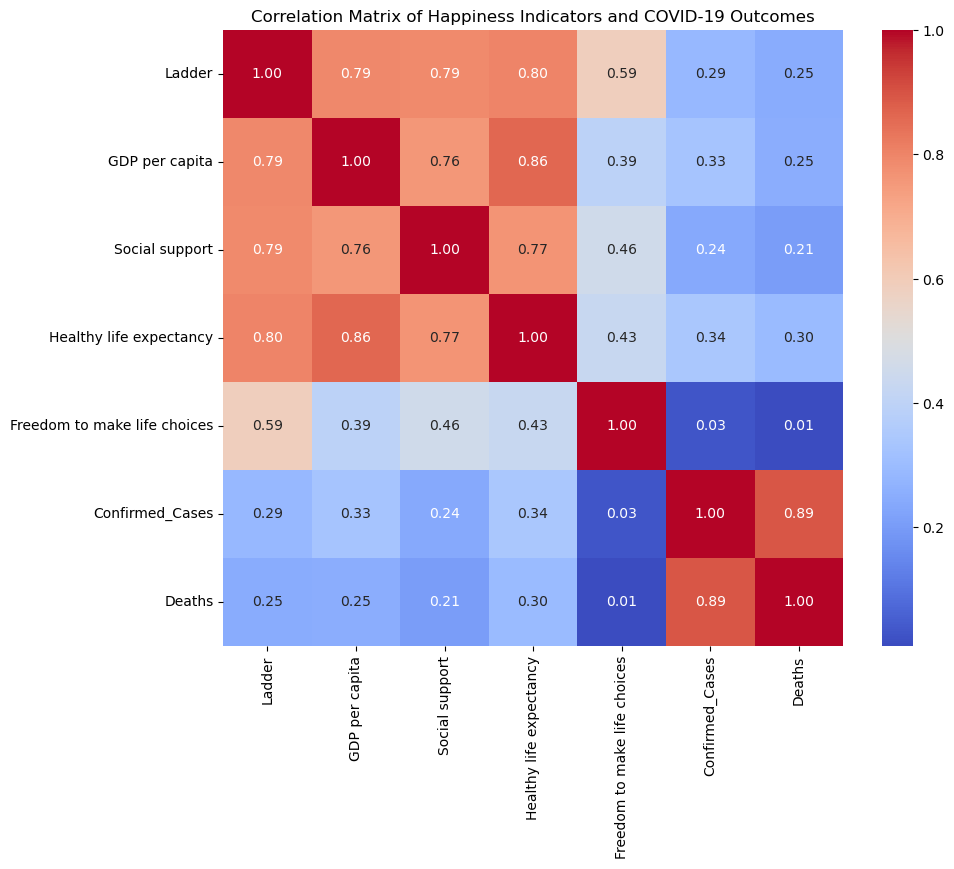

In [7]:
# Select relevant columns for the correlation matrix
correlation_data = merged_df[['Ladder', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Confirmed_Cases', 'Deaths']]

# Calculate the correlation matrix
corr_matrix = correlation_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Happiness Indicators and COVID-19 Outcomes')
plt.show()



4.2. Visualizing Key Relationships
We will create scatter plots to visualize the relationship between happiness scores and COVID-19 confirmed cases and deaths.

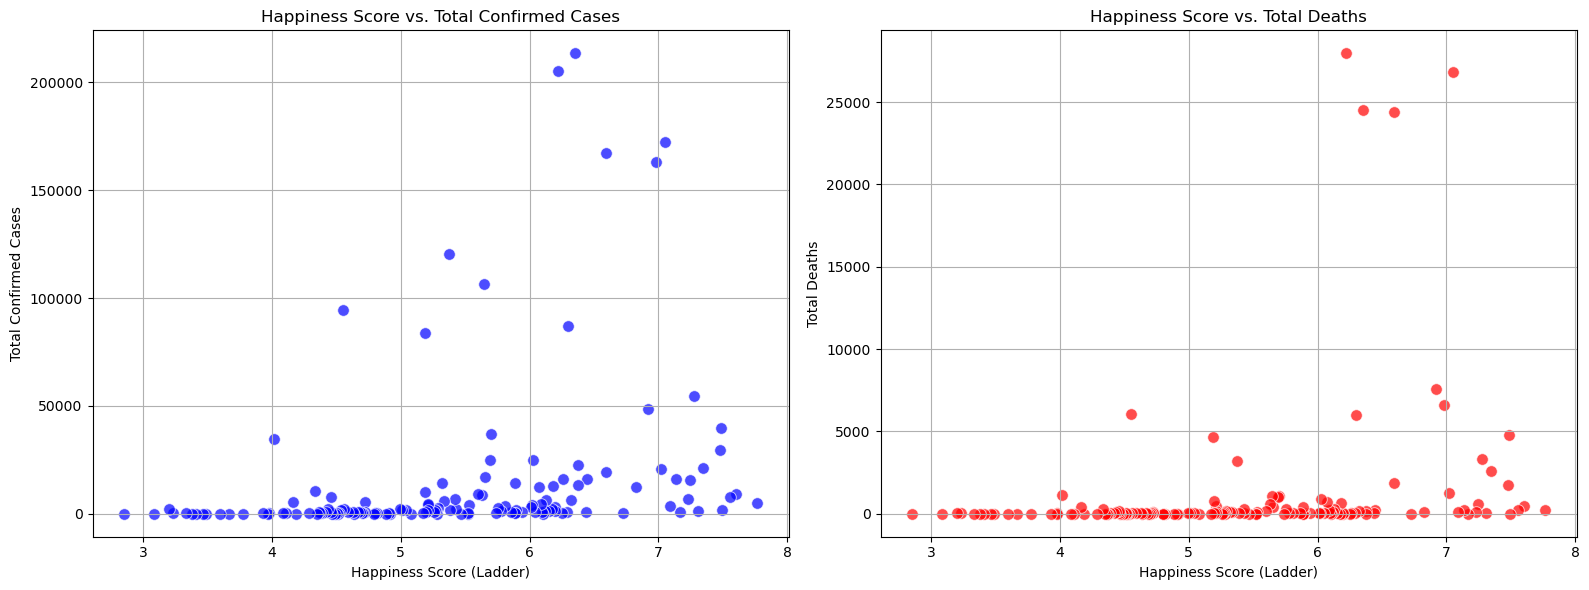

In [8]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot for Happiness Score vs. Total Confirmed Cases
sns.scatterplot(
    x='Ladder',
    y='Confirmed_Cases',
    data=merged_df,
    ax=axes[0],
    alpha=0.7,
    s=70,
    color='b'
)
axes[0].set_title('Happiness Score vs. Total Confirmed Cases')
axes[0].set_xlabel('Happiness Score (Ladder)')
axes[0].set_ylabel('Total Confirmed Cases')
axes[0].grid(True)

# Scatter plot for Happiness Score vs. Total Deaths
sns.scatterplot(
    x='Ladder',
    y='Deaths',
    data=merged_df,
    ax=axes[1],
    alpha=0.7,
    s=70,
    color='r'
)
axes[1].set_title('Happiness Score vs. Total Deaths')
axes[1].set_xlabel('Happiness Score (Ladder)')
axes[1].set_ylabel('Total Deaths')
axes[1].grid(True)

plt.tight_layout()
plt.show()

5. Key Insights and Conclusion
Based on the visualizations and the correlation matrix, we can draw the following conclusions:

Correlation Findings: The correlation matrix shows a positive but weak correlation between a country's happiness score (Ladder), GDP, and Confirmed_Cases and Deaths. This suggests that happier, wealthier countries, often with more international travel and stronger testing infrastructure, may have reported higher absolute numbers of cases and deaths.

Visual Analysis: The scatter plots reveal a positive trend, but with significant spread. This means that while some high-happiness countries reported many cases and deaths, there are also high-happiness countries with low numbers, and vice-versa. There isn't a simple inverse relationship.

Answering the Core Question: The analysis does not support the idea that "happier countries had better COVID-19 outcomes" in terms of fewer confirmed cases and deaths. In fact, the data suggests a slight positive correlation, which could be attributed to factors like global travel, better reporting, and different pandemic response strategies rather than happiness itself.

Overall Summary: The project successfully demonstrates how to integrate disparate datasets to perform a combined analysis. While our initial hypothesis may not have been confirmed, the analysis provides valuable insights into the complex relationship between a country's well-being and its experience during a global pandemic. Further analysis could explore per-capita data or other factors like government effectiveness and public health policies.